HW4- CS584
G01314326- Kaustubh Prashant Karanjkar

# Part1

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.sparse as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import xgboost as xgb
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score


In [52]:
df_OG = pd.read_table("train.txt", delimiter=',',na_values=[" ?"])
df_OG = df_OG.dropna()
df_OG

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
df_OG['income'] =  [1 if income == ' >50K' else 0 for income in df_OG['income']]

#Define protected variables 
df_OG['race'] = [1 if r==' White' else 0 for r in df_OG['race']]
df_OG['sex'] = [1 if s==' Male' else 0 for s in df_OG['sex']]

In [54]:
df_OG

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,1,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,1,1,0,0,20,United-States,0


In [55]:
le = preprocessing.LabelEncoder()
df_encode=df_OG.apply(le.fit_transform)
df_encode

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,9,12,4,0,1,1,1,24,0,39,38,0
1,33,4,9,12,2,3,0,1,1,0,0,12,38,0
2,21,2,11,8,0,5,1,1,1,0,0,39,38,0
3,36,2,1,6,2,5,0,0,1,0,0,39,38,0
4,11,2,9,12,2,9,5,0,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,7,11,2,12,5,1,0,0,0,37,38,0
32557,23,2,11,8,2,6,0,1,1,0,0,39,38,1
32558,41,2,11,8,6,0,4,1,0,0,0,39,38,0
32559,5,2,11,8,4,0,3,1,1,0,0,19,38,0


In [56]:
#dropping 'income' column
df_new=df_encode.drop('income', axis=1)

In [57]:
y = df_encode.income
y_arr = y.values
y_arr

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y_arr, test_size=0.2, random_state=27)

In [59]:
X_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
26871,36,2,11,8,2,13,0,1,1,0,47,39,38
22869,23,2,12,13,4,9,1,1,0,0,31,39,38
14780,9,2,11,8,2,9,0,1,1,0,0,39,38
8948,36,2,15,9,6,11,1,1,0,0,0,39,38
15568,14,2,11,8,2,4,0,1,1,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,14,3,15,9,2,0,5,1,0,0,0,19,38
16060,38,1,9,12,6,9,1,1,0,0,0,47,38
4267,32,2,9,12,2,2,0,1,1,0,47,39,38
21753,5,2,15,9,4,9,1,1,1,0,0,11,38


In [60]:
#XGBoost Classifier
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_predXGB = xgb.predict(X_test)
score_xgb = xgb.score(X_test,y_test)
print('The accuracy of the XG Boost Classifier Model is',score_xgb)
print('accuracy', accuracy_score(y_test,y_predXGB))
print('f1',f1_score(y_test,y_predXGB))

The accuracy of the XG Boost Classifier Model is 0.8627548483341622
accuracy 0.8627548483341622
f1 0.6830015313935681


In [61]:
#Decision Tree Classifier 
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
y_predDT = clf.predict(X_test)
score_decision = clf.score(X_test,y_test)
print('The accuracy of the Decision Tree Model is',score_decision)
print('accuracy', accuracy_score(y_test,y_predDT) )
print('f1',f1_score(y_test,y_predDT))

The accuracy of the Decision Tree Model is 0.8059008785015747
accuracy 0.8059008785015747
f1 0.611608623548922


In [62]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)
print('accuracy', accuracy_score(y_test,y_predKNN) )
print('f1',f1_score(y_test,y_predKNN))

The accuracy of the KNN Model is 0.8181667495441737
accuracy 0.8181667495441737
f1 0.6254694434960738


In [63]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_predRF = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)
print('accuracy', accuracy_score(y_test,y_predRF) )
print('f1',f1_score(y_test,y_predRF))

The accuracy of the Random Forest Model is 0.8448533068125311
accuracy 0.8448533068125311
f1 0.6680851063829787


In [64]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predLR = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)
print('accuracy', accuracy_score(y_test,y_predLR) )
print('f1',f1_score(y_test,y_predLR))

The accuracy of the Logistic Regression is 0.8191612796287088
accuracy 0.8191612796287088
f1 0.5452271779908295


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
#SVM Classifier
linsvc = LinearSVC(random_state=27)
linsvc.fit(X_train, y_train)
y_predSVM = linsvc.predict(X_test)
score_svm = linsvc.score(X_test,y_test)
print('The accuracy of the SVM is', score_svm)
print('accuracy', accuracy_score(y_test,y_predSVM) )
print('f1',f1_score(y_test,y_predSVM))

The accuracy of the SVM is 0.5057185479860766
accuracy 0.5057185479860766
f1 0.4847961299239806


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [66]:
y_predXGB.shape

(6033,)

Actual test file

In [ ]:
dfOG = pd.read_table("train.txt", delimiter=',',na_values=[" ?"])
dfOG['income'] =  [1 if income == ' >50K' else 0 for income in dfOG['income']]
dfOG_encode=dfOG.apply(le.fit_transform)

yOG = dfOG_encode.income
yOG_arr = yOG.values
dfOG_new=dfOG_encode.drop('income', axis=1)
dfOG_new

In [ ]:
yOG_arr.shape

In [146]:
dfOG_new

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,9,12,4,0,1,4,1,25,0,39,38
1,33,5,9,12,2,3,0,4,1,0,0,12,38
2,21,3,11,8,0,5,1,4,1,0,0,39,38
3,36,3,1,6,2,5,0,2,1,0,0,39,38
4,11,3,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,7,11,2,12,5,4,0,0,0,37,38
32557,23,3,11,8,2,6,0,4,1,0,0,39,38
32558,41,3,11,8,6,0,4,4,0,0,0,39,38
32559,5,3,11,8,4,0,3,4,1,0,0,19,38


In [150]:
df_TEST = pd.read_table("test.txt", delimiter=',',na_values=[" ?"])

df_TEST

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16277,64,NaN,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [151]:
dfTEST_encode=df_TEST.apply(le.fit_transform)
dfTEST_encode

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,8,3,1,6,4,6,3,2,1,0,0,39,37
1,21,3,11,8,2,4,0,4,1,0,0,49,37
2,11,1,7,11,2,10,0,4,1,0,0,39,37
3,27,3,15,9,2,6,0,2,1,90,0,39,37
4,1,8,15,9,4,14,3,4,0,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,22,3,9,12,0,9,1,4,0,0,0,35,37
16277,47,8,11,8,6,14,2,2,1,0,0,39,37
16278,21,3,9,12,2,9,0,4,1,0,0,49,37
16279,27,3,9,12,0,0,3,1,1,75,0,39,37


In [154]:
#XGBoost Classifier
xgb = xgb.XGBClassifier()
xgb.fit(dfOG_new, yOG_arr)
y_prediction = xgb.predict(dfTEST_encode)
y_prediction.shape

(16281,)

In [155]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in y_prediction)
resultFile.close()

# PART2- Demographic Parity, Equal Opportunity and Equalized Odds

In [67]:
race_sensitive = X_test.race
race_sensitive_arr = race_sensitive.values
# race_sensitive.value_counts()

sex_sensitive = X_test.sex
sex_sensitive_arr = sex_sensitive.values

In [156]:
race_sensitive.value_counts()

1    5208
0     825
Name: race, dtype: int64

In [157]:
sex_sensitive.value_counts()

1    4030
0    2003
Name: sex, dtype: int64

In [68]:
#Demographic Parity
def DParity(sensitive, pred):
  len = sensitive.shape[0]
  sZero=0
  sOne=0
  sensitiveZero=0
  sensitiveOne=0
  for i in range(len):
    if pred[i]==1 and sensitive[i]==0:
      sZero+=1
    if pred[i]==1 and sensitive[i]==1:
      sOne+=1

  for j in range(len):
    if sensitive[j]==0:
      sensitiveZero+=1
    else:
      sensitiveOne+=1

  disparity = abs(sZero/sensitiveZero - sOne/sensitiveOne)
  return disparity

In [69]:
print('Demographic Parity(Race): XGBoost- ',DParity(race_sensitive_arr,y_predXGB))
print('Demographic Parity(Sex): XGBoost- ',DParity(sex_sensitive_arr,y_predXGB))
print('\n')
print('Demographic Parity(Race): Decision Tree- ',DParity(race_sensitive_arr,y_predDT))
print('Demographic Parity(Sex): Decsion Tree- ',DParity(sex_sensitive_arr,y_predDT))
print('\n')
print('Demographic Parity(Race): KNN- ',DParity(race_sensitive_arr,y_predKNN))
print('Demographic Parity(Sex): KNN- ',DParity(sex_sensitive_arr,y_predKNN))
print('\n')
print('Demographic Parity(Race): Random Forest- ',DParity(race_sensitive_arr,y_predRF))
print('Demographic Parity(Sex): Random Forest- ',DParity(sex_sensitive_arr,y_predRF))
print('\n')
print('Demographic Parity(Race): Logistic Regression- ',DParity(race_sensitive_arr,y_predLR))
print('Demographic Parity(Sex): Logistic Regression- ',DParity(sex_sensitive_arr,y_predLR))
print('\n')
print('Demographic Parity(Race): SVM- ',DParity(race_sensitive_arr,y_predSVM))
print('Demographic Parity(Sex): SVM- ',DParity(sex_sensitive_arr,y_predSVM))

Demographic Parity(Race): XGBoost-  0.0808930316994833
Demographic Parity(Sex): XGBoost-  0.17004629532128607


Demographic Parity(Race): Decision Tree-  0.09649211004049715
Demographic Parity(Sex): Decsion Tree-  0.1968020673704084


Demographic Parity(Race): KNN-  0.11086999022482893
Demographic Parity(Sex): KNN-  0.1986312095132735


Demographic Parity(Race): Random Forest-  0.11240678676162548
Demographic Parity(Sex): Random Forest-  0.19400576554523052


Demographic Parity(Race): Logistic Regression-  0.004891076665270222
Demographic Parity(Sex): Logistic Regression-  0.1784786839591729


Demographic Parity(Race): SVM-  0.21753107107945813
Demographic Parity(Sex): SVM-  0.3871296033617068


In [70]:
#Equality of Opportunity
def eqOpportunity(sensitive, pred, label):
  len = sensitive.shape[0]
  sZeroPos=0
  sZeroNeg=0
  sOnePos=0
  sOneNeg=0
  for i in range(len):
    if sensitive[i]==0:
      if pred[i]==1 and label[i]==1:
        sZeroPos+=1
      elif pred[i]==0 and label[i]==1:
        sZeroNeg+=1
    elif sensitive[i]==1:
      if pred[i]==1 and label[i]==1:
        sOnePos+=1
      elif pred[i]==0 and label[i]==1:
        sOneNeg+=1

  tpr1 = sZeroPos/(sZeroPos+sZeroNeg)
  tpr2 = sOnePos/(sOnePos+sOneNeg)
  total = abs(tpr1-tpr2)
  # total = sZeroPos+sZeroNeg+sOnePos+sOneNeg
  # tpr = (sZeroPos+sOnePos)/total
  return total

In [71]:
print('Equality of Opportunity(Race): XGBoost- ',eqOpportunity(race_sensitive_arr,y_predXGB,y_test))
print('Equality of Opportunity(Sex): XGBoost- ',eqOpportunity(sex_sensitive_arr,y_predXGB,y_test))
print('\n')
print('Equality of Opportunity(Race): Decision Tree- ',eqOpportunity(race_sensitive_arr,y_predDT,y_test))
print('Equality of Opportunity(Sex): Decsion Tree- ',eqOpportunity(sex_sensitive_arr,y_predDT,y_test))
print('\n')
print('Equality of Opportunity(Race): KNN- ',eqOpportunity(race_sensitive_arr,y_predKNN,y_test))
print('Equality of Opportunity(Sex): KNN- ',eqOpportunity(sex_sensitive_arr,y_predKNN,y_test))
print('\n')
print('Equality of Opportunity(Race): Random Forest- ',eqOpportunity(race_sensitive_arr,y_predRF,y_test))
print('Equality of Opportunity(Sex): Random Forest- ',eqOpportunity(sex_sensitive_arr,y_predRF,y_test))
print('\n')
print('Equality of Opportunity(Race): Logistic Regression- ',eqOpportunity(race_sensitive_arr,y_predLR,y_test))
print('Equality of Opportunity(Sex): Logistic Regression- ',eqOpportunity(sex_sensitive_arr,y_predLR,y_test))
print('\n')
print('Equality of Opportunity(Race): SVM- ',eqOpportunity(race_sensitive_arr,y_predSVM,y_test))
print('Equality of Opportunity(Sex): SVM- ',eqOpportunity(sex_sensitive_arr,y_predSVM,y_test))

Equality of Opportunity(Race): XGBoost-  0.024747225577425813
Equality of Opportunity(Sex): XGBoost-  0.07415399419715107


Equality of Opportunity(Race): Decision Tree-  0.012691175720045633
Equality of Opportunity(Sex): Decsion Tree-  0.03757271786198546


Equality of Opportunity(Race): KNN-  0.0762377865863686
Equality of Opportunity(Sex): KNN-  0.1419510986046919


Equality of Opportunity(Race): Random Forest-  0.035873269707331734
Equality of Opportunity(Sex): Random Forest-  0.047720413489436786


Equality of Opportunity(Race): Logistic Regression-  0.1578401184056073
Equality of Opportunity(Sex): Logistic Regression-  0.28111741292081593


Equality of Opportunity(Race): SVM-  0.04225288216714018
Equality of Opportunity(Sex): SVM-  0.2709915873270444


In [85]:
#Equalized Odd
def eqOdd(sensitive, pred, label):
  len = sensitive.shape[0]
  
  s1ZeroPos=0
  s1ZeroNeg=0
  s1OnePos=0
  s1OneNeg=0

  for i in range(len):
    if sensitive[i]==0:
      if pred[i]==1 and label[i]==0:
        s1ZeroPos+=1
      elif pred[i]==0 and label[i]==0:
        s1ZeroNeg+=1
    elif sensitive[i]==1:
      if pred[i]==1 and label[i]==0:
        s1OnePos+=1
      elif pred[i]==0 and label[i]==0:
        s1OneNeg+=1

  fpr1 = s1ZeroPos/(s1ZeroPos+s1ZeroNeg)
  fpr2 = s1OnePos/(s1OnePos+s1OneNeg)
  fpr = abs(fpr1-fpr2)
  return fpr

In [86]:
print('Equality of Odds(Race): XGBoost- ',eqOdd(race_sensitive_arr,y_predXGB,y_test))
print('Equality of Odds(Sex): XGBoost- ',eqOdd(sex_sensitive_arr,y_predXGB,y_test))
print('\n')
print('Equality of Odds(Race): Decision Tree- ',eqOdd(race_sensitive_arr,y_predDT,y_test))
print('Equality of Odds(Sex): Decsion Tree- ',eqOdd(sex_sensitive_arr,y_predDT,y_test))
print('\n')
print('Equality of Odds(Race): KNN- ',eqOdd(race_sensitive_arr,y_predKNN,y_test))
print('Equality of Odds(Sex): KNN- ',eqOdd(sex_sensitive_arr,y_predKNN,y_test))
print('\n')
print('Equality of Odds(Race): Random Forest- ',eqOdd(race_sensitive_arr,y_predRF,y_test))
print('Equality of Odds(Sex): Random Forest- ',eqOdd(sex_sensitive_arr,y_predRF,y_test))
print('\n')
print('Equality of Odds(Race): Logistic Regression- ',eqOdd(race_sensitive_arr,y_predLR,y_test))
print('Equality of Odds(Sex): Logistic Regression- ',eqOdd(sex_sensitive_arr,y_predLR,y_test))
print('\n')
print('Equality of Odds(Race): SVM- ',eqOdd(race_sensitive_arr,y_predSVM,y_test))
print('Equality of Odds(Sex): SVM- ',eqOdd(sex_sensitive_arr,y_predSVM,y_test))

Equality of Odds(Race): XGBoost-  0.02267840630582912
Equality of Odds(Sex): XGBoost-  0.054750525408793674


Equality of Odds(Race): Decision Tree-  0.056994706239694534
Equality of Odds(Sex): Decsion Tree-  0.11019569697724164


Equality of Odds(Race): KNN-  0.054835232084556526
Equality of Odds(Sex): KNN-  0.09123521308855752


Equality of Odds(Race): Random Forest-  0.05872213593801902
Equality of Odds(Sex): Random Forest-  0.089175073614186


Equality of Odds(Race): Logistic Regression-  0.01154400344737811
Equality of Odds(Sex): Logistic Regression-  0.07307677599563238


Equality of Odds(Race): SVM-  0.2158546475265361
Equality of Odds(Sex): SVM-  0.3536184250673084


# Part3- remove sensitive attributes

In [87]:
df_noSensitive = df_new.drop('race', axis=1)
df_noSensitive = df_noSensitive.drop('sex', axis=1)
df_noSensitive

,age,workclass,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,9,12,4,0,1,24,0,39,38
1,33,4,9,12,2,3,0,0,0,12,38
2,21,2,11,8,0,5,1,0,0,39,38
3,36,2,1,6,2,5,0,0,0,39,38
4,11,2,9,12,2,9,5,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,7,11,2,12,5,0,0,37,38
32557,23,2,11,8,2,6,0,0,0,39,38
32558,41,2,11,8,6,0,4,0,0,39,38
32559,5,2,11,8,4,0,3,0,0,19,38


In [88]:
X_trainSen, X_testSen, y_trainSen, y_testSen = train_test_split(df_noSensitive, y_arr, test_size=0.2, random_state=27)

In [91]:
#XGBoost Classifier
xgb = xgb.XGBClassifier()
xgb.fit(X_trainSen, y_trainSen)
y_predXGBSen = xgb.predict(X_testSen)
score_xgbSen = xgb.score(X_testSen,y_testSen)
print('The accuracy of the XG Boost Classifier Model is',score_xgbSen)
print('accuracy', accuracy_score(y_testSen,y_predXGBSen))
print('f1',f1_score(y_testSen,y_predXGBSen))

The accuracy of the XG Boost Classifier Model is 0.863583623404608
accuracy 0.863583623404608
f1 0.6852772466539196


In [127]:
print('After removing sensitive attributes\n')
print('Demographic Parity(Race): XGBoost- ',DParity(race_sensitive_arr,y_predXGBSen))
print('Demographic Parity(Sex): XGBoost- ',DParity(sex_sensitive_arr,y_predXGBSen))
print('\n')
print('Equality of Opportunity(Race): XGBoost- ',eqOpportunity(race_sensitive_arr,y_predXGBSen,y_testSen))
print('Equality of Opportunity(Sex): XGBoost- ',eqOpportunity(sex_sensitive_arr,y_predXGBSen,y_testSen))
print('\n')
print('Equality of Odds(Race): XGBoost- ',eqOdd(race_sensitive_arr,y_predXGBSen,y_testSen))
print('Equality of Odds(Sex): XGBoost- ',eqOdd(sex_sensitive_arr,y_predXGBSen,y_testSen))

After removing sensitive attributes

Demographic Parity(Race): XGBoost-  0.08006493506493506
Demographic Parity(Sex): XGBoost-  0.168548541951341


Equality of Opportunity(Race): XGBoost-  0.027673341158991227
Equality of Opportunity(Sex): XGBoost-  0.05546240541210434


Equality of Odds(Race): XGBoost-  0.020720926961668863
Equality of Odds(Sex): XGBoost-  0.055309496901247555


In [93]:
randomforest = RandomForestClassifier()
randomforest.fit(X_trainSen, y_trainSen)
y_predRFSen = randomforest.predict(X_testSen)
score_randomforestSen = randomforest.score(X_testSen,y_testSen)
print('The accuracy of the Random Forest Model is', score_randomforestSen)
print('accuracy', accuracy_score(y_testSen,y_predRFSen) )
print('f1',f1_score(y_testSen,y_predRFSen))

The accuracy of the Random Forest Model is 0.8428642466434609
accuracy 0.8428642466434609
f1 0.667601683029453


In [125]:
print('After removing sensitive attributes\n')
print('Demographic Parity(Race): Random Forest- ',DParity(race_sensitive_arr,y_predRFSen))
print('Demographic Parity(Sex): Random Forest- ',DParity(sex_sensitive_arr,y_predRFSen))
print('\n')
print('Equality of Opportunity(Race): Random Forest- ',eqOpportunity(race_sensitive_arr,y_predRFSen,y_testSen))
print('Equality of Opportunity(Sex): Random Forest- ',eqOpportunity(sex_sensitive_arr,y_predRFSen,y_testSen))
print('\n')
print('Equality of Odds(Race): Random Forest- ',eqOdd(race_sensitive_arr,y_predRFSen,y_testSen))
print('Equality of Odds(Sex): Random Forest- ',eqOdd(sex_sensitive_arr,y_predRFSen,y_testSen))

After removing sensitive attributes

Demographic Parity(Race): Random Forest-  0.0890643764837313
Demographic Parity(Sex): Random Forest-  0.18774580065385793


Equality of Opportunity(Race): Random Forest-  0.01773815802158296
Equality of Opportunity(Sex): Random Forest-  0.0446148687068979


Equality of Odds(Race): Random Forest-  0.03390146244243148
Equality of Odds(Sex): Random Forest-  0.08149206333708423


Proxy variable

In [95]:
df_OG

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,1,0,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,1,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,1,1,0,0,20,United-States,0


In [121]:
#Model features
dfModified = df_OG[['age','education-num','hours-per-week']]
dfModified['marital-status'] = [1 if x==' Married-civ-spouse' else 0 for x in df_OG['marital-status']] 
dfModified['native-country'] = [1 if x==' United-States' else 0 for x in df_OG['native-country']] 

occ_groups = {
    ' Priv-house-serv':0,' Other-service':0,' Handlers-cleaners':0,
    ' Farming-fishing':1,' Machine-op-inspct':1,' Adm-clerical':1,
    ' Transport-moving':2,' Craft-repair':2,' Sales':2,
    ' Armed-Forces':3,' Tech-support':3,' Protective-serv':3,
    ' Prof-specialty':4,' Exec-managerial':4}

dfModified['occupation'] = [occ_groups[x] for x in df_OG['occupation']]

dfModified.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


([<matplotlib.axis.XTick at 0x7fa435b64ad0>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'education-num'),
  Text(0, 0, 'hours-per-week'),
  Text(0, 0, 'marital-status'),
  Text(0, 0, 'native-country'),
  Text(0, 0, 'occupation')])

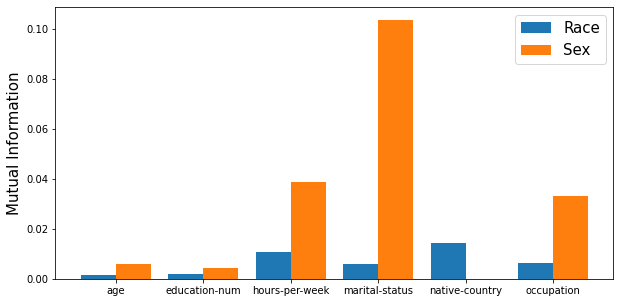

In [123]:
#Mutual information 

#Calcualte mutual information
m_race = mutual_info_classif(dfModified,df_OG['race'],discrete_features=[1,3,4,5])
m_sex = mutual_info_classif(dfModified,df_OG['sex'],discrete_features=[1,3,4,5])


#Plot mutual information 
plt.figure(figsize=(10, 5))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']
x = np.arange(len(labels)) 
width = 0.4
plt.bar(x-width/2,height= m_race,width=width,label='Race')
plt.bar(x+width/2,height= m_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels)

# plt.savefig(path.format("Mutual_information.png"),dpi=100)


In [106]:
df_noSensitiveProxy = df_noSensitive.drop('marital-status', axis=1)
df_noSensitiveProxy = df_noSensitiveProxy.drop('occupation', axis=1)
df_noSensitiveProxy = df_noSensitiveProxy.drop('hours-per-week', axis=1)
df_noSensitiveProxy

,age,workclass,education,education-num,relationship,capital-gain,capital-loss,native-country
0,22,5,9,12,1,24,0,38
1,33,4,9,12,0,0,0,38
2,21,2,11,8,1,0,0,38
3,36,2,1,6,0,0,0,38
4,11,2,9,12,5,0,0,4
...,...,...,...,...,...,...,...,...
32556,10,2,7,11,5,0,0,38
32557,23,2,11,8,0,0,0,38
32558,41,2,11,8,4,0,0,38
32559,5,2,11,8,3,0,0,38


In [107]:
X_trainProxy, X_testProxy, y_trainProxy, y_testProxy = train_test_split(df_noSensitiveProxy, y_arr, test_size=0.2, random_state=27)

In [114]:
#XGBoost Classifier
xgb = xgb.XGBClassifier()
xgb.fit(X_trainProxy, y_trainProxy)
y_predXGBProxy = xgb.predict(X_testProxy)
score_xgbProxy = xgb.score(X_testProxy,y_testProxy)
print('The accuracy of the XG Boost Classifier Model is',score_xgbProxy)
print('accuracy', accuracy_score(y_testProxy,y_predXGBProxy))
print('f1',f1_score(y_testProxy,y_predXGBProxy))

The accuracy of the XG Boost Classifier Model is 0.8567876678269518
accuracy 0.8567876678269518
f1 0.6601101494885916


In [115]:
print('After removing proxy and sensitive attributes\n')
print('Demographic Parity(Race): XGBoost- ',DParity(race_sensitive_arr,y_predXGBProxy))
print('Demographic Parity(Sex): XGBoost- ',DParity(sex_sensitive_arr,y_predXGBProxy))
print('\n')
print('Equality of Opportunity(Race): XGBoost- ',eqOpportunity(race_sensitive_arr,y_predXGBProxy,y_testProxy))
print('Equality of Opportunity(Sex): XGBoost- ',eqOpportunity(sex_sensitive_arr,y_predXGBProxy,y_testProxy))
print('\n')
print('Equality of Odds(Race): XGBoost- ',eqOdd(race_sensitive_arr,y_predXGBProxy,y_testProxy))
print('Equality of Odds(Sex): XGBoost- ',eqOdd(sex_sensitive_arr,y_predXGBProxy,y_testProxy))

After removing proxy and sensitive attributes

Demographic Parity(Race): XGBoost-  0.07166457198715265
Demographic Parity(Sex): XGBoost-  0.15192917819300825


Equality of Opportunity(Race): XGBoost-  0.02839352852112087
Equality of Opportunity(Sex): XGBoost-  0.03281234053100446


Equality of Odds(Race): XGBoost-  0.014858214605272216
Equality of Odds(Sex): XGBoost-  0.04764133557572843


In [128]:
#Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_trainProxy, y_trainProxy)
y_predRFProxy = randomforest.predict(X_testProxy)
score_randomforestProxy = randomforest.score(X_testProxy,y_testProxy)
print('The accuracy of the Random Forest Model is', score_randomforestProxy)
print('accuracy', accuracy_score(y_testProxy,y_predRFProxy) )
print('f1',f1_score(y_testProxy,y_predRFProxy))

The accuracy of the Random Forest Model is 0.8402121664180342
accuracy 0.8402121664180342
f1 0.6527377521613832


In [129]:
print('After removing sensitive attributes\n')
print('Demographic Parity(Race): Random Forest- ',DParity(race_sensitive_arr,y_predRFProxy))
print('Demographic Parity(Sex): Random Forest- ',DParity(sex_sensitive_arr,y_predRFProxy))
print('\n')
print('Equality of Opportunity(Race): Random Forest- ',eqOpportunity(race_sensitive_arr,y_predRFProxy,y_testProxy))
print('Equality of Opportunity(Sex): Random Forest- ',eqOpportunity(sex_sensitive_arr,y_predRFProxy,y_testProxy))
print('\n')
print('Equality of Odds(Race): Random Forest- ',eqOdd(race_sensitive_arr,y_predRFProxy,y_testProxy))
print('Equality of Odds(Sex): Random Forest- ',eqOdd(sex_sensitive_arr,y_predRFProxy,y_testProxy))

After removing sensitive attributes

Demographic Parity(Race): Random Forest-  0.09553344504957409
Demographic Parity(Sex): Random Forest-  0.15842377872397362


Equality of Opportunity(Race): Random Forest-  0.06043903075256751
Equality of Opportunity(Sex): Random Forest-  0.0021724233455319153


Equality of Odds(Race): Random Forest-  0.03627377927802566
Equality of Odds(Sex): Random Forest-  0.05950056263287777
